# download example 

- https://pdal.io/tutorial/iowa-entwine.html


- https://gist.githubusercontent.com/hobu/ee22084e24ed7e3c0d10600798a94c31/raw/107a16724e79c71c8a26b299ecdcf4737e77afcd/gistfile1.txt

In [2]:
! wget https://gist.githubusercontent.com/hobu/ee22084e24ed7e3c0d10600798a94c31/raw/107a16724e79c71c8a26b299ecdcf4737e77afcd/gistfile1.txt

--2022-05-02 19:26:15--  https://gist.githubusercontent.com/hobu/ee22084e24ed7e3c0d10600798a94c31/raw/107a16724e79c71c8a26b299ecdcf4737e77afcd/gistfile1.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘gistfile1.txt’

100%[======================================>] 1,359       --.-K/s   in 0s      

2022-05-02 19:26:16 (53.2 MB/s) - ‘gistfile1.txt’ saved [1359/1359]



In [3]:
! cat gistfile1.txt

{
    "pipeline": [
        {
"bounds": "([-10425171.940, -10423171.940], [5164494.710, 5166494.710])",
"filename": "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json",
"type": "readers.ept",
"tag": "readdata"
        },
        {
            "limits": "Classification![7:7]",
            "type": "filters.range",
            "tag": "nonoise"
        },
        {
            "assignment": "Classification[:]=0",
            "tag": "wipeclasses",
            "type": "filters.assign"
        },
        {
            "out_srs": "EPSG:26915",
            "tag": "reprojectUTM",
            "type": "filters.reprojection"
        },
        {
            "tag": "groundify",
            "type": "filters.smrf"
        },
        {
            "limits": "Classification[2:2]",
            "type": "filters.range",
            "tag": "classify"
        },
        {
            "filename": "iowa.laz",
            "inputs": [ "classify" ],
            "tag": "writerslas",
      

In [4]:
! cp gistfile1.txt iowa_pdal_pipeline.json

In [6]:
! pdal pipeline iowa_pdal_pipeline.json --debug

(PDAL Debug) Debugging...
(pdal pipeline readers.ept Debug) Query bounds: ([-10425171.94, -10423171.94], [5164494.71, 5166494.71], [-1.797693134862316e+308, 1.797693134862316e+308])
Threads: 15
(pdal pipeline Debug) Executing pipeline in standard mode.
(pdal pipeline filters.smrf Debug) progressiveFilter: radius = 1	2234705 ground cells	3302 non-ground cells	(0.15% of cells contain ground)
(pdal pipeline filters.smrf Debug) progressiveFilter: radius = 1	2026879 ground cells	211128 non-ground cells	(9.43% of cells contain ground)
(pdal pipeline filters.smrf Debug) progressiveFilter: radius = 2	1979134 ground cells	258873 non-ground cells	(11.57% of cells contain ground)
(pdal pipeline filters.smrf Debug) progressiveFilter: radius = 3	1959708 ground cells	278299 non-ground cells	(12.44% of cells contain ground)
(pdal pipeline filters.smrf Debug) progressiveFilter: radius = 4	1948026 ground cells	289981 non-ground cells	(12.96% of cells contain ground)
(pdal pipeline filters.smrf Debug) p

In [8]:
!ls -l

total 23020
-rw-rw-r-- 1 ec2-user ec2-user  1663547 May  2 19:08 1_view_IA_MN.ipynb
-rw-rw-r-- 1 ec2-user ec2-user       40 May  2 18:52 filename.txt
-rw-rw-r-- 1 ec2-user ec2-user     1359 May  2 19:26 gistfile1.txt
-rw-rw-r-- 1 ec2-user ec2-user      395 May  2 19:03 ia_northcentral.json
-rw-rw-r-- 1 ec2-user ec2-user  7005851 May  2 19:32 iowa.laz
-rw-rw-r-- 1 ec2-user ec2-user     1359 May  2 19:31 iowa_pdal_pipeline.json
-rw-rw-r-- 1 ec2-user ec2-user 14865846 May  2 19:32 iowa.tif
-rw-rw-r-- 1 ec2-user ec2-user     8843 May  2 19:33 Untitled.ipynb


In [9]:
! rio info iowa.tif

{"blockxsize": 256, "blockysize": 256, "bounds": [446112.3908587211, 4652575.19273306, 447611.3908587211, 4654068.19273306], "colorinterp": ["gray"], "compress": "deflate", "count": 1, "crs": "EPSG:26915", "descriptions": ["idw"], "driver": "GTiff", "dtype": "float64", "height": 1493, "indexes": [1], "interleave": "band", "lnglat": [-93.6419260917175, 42.03013773287712], "mask_flags": [["nodata"]], "nodata": -9999.0, "res": [1.0, 1.0], "shape": [1493, 1499], "tiled": true, "transform": [1.0, 0.0, 446112.3908587211, 0.0, -1.0, 4654068.19273306, 0.0, 0.0, 1.0], "units": [null], "width": 1499}


In [10]:
! rio bounds iowa.tif

{"bbox": [-93.65104833988396, 42.023363669524194, -93.63280575673863, 42.03691108775345], "geometry": {"coordinates": [[[-93.65104833988396, 42.023363669524194], [-93.63280575673863, 42.023363669524194], [-93.63280575673863, 42.03691108775345], [-93.65104833988396, 42.03691108775345], [-93.65104833988396, 42.023363669524194]]], "type": "Polygon"}, "properties": {"filename": "iowa.tif", "id": "0", "title": "iowa.tif"}, "type": "Feature"}


# Iowa state University that is what i was after - coincidence

- geojson.io 

In [14]:
import matplotlib.pyplot as plt
img = plt.imread('iowa.tif')
plt.imshow(img)
plt.show()

UnidentifiedImageError: cannot identify image file 'iowa.tif'

In [17]:
import xarray
filename = 'iowa.tif'
ds = xarray.open_rasterio(filename)

/tmp/ipykernel_18317/1044866336.py:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  ds = xarray.open_rasterio(filename)


In [18]:
ds

<xarray.DataArray (band: 1, y: 1493, x: 1499)>
[2238007 values with dtype=float64]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.654e+06 4.654e+06 4.654e+06 ... 4.653e+06 4.653e+06
  * x        (x) float64 4.461e+05 4.461e+05 4.461e+05 ... 4.476e+05 4.476e+05
Attributes:
    transform:      (1.0, 0.0, 446112.3908587211, 0.0, -1.0, 4654068.19273306)
    crs:            +init=epsg:26915
    res:            (1.0, 1.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('idw',)
    AREA_OR_POINT:  Area

In [19]:
ds1 = ds.drop('band')

In [20]:
ds1

<xarray.DataArray (band: 1, y: 1493, x: 1499)>
[2238007 values with dtype=float64]
Coordinates:
  * y        (y) float64 4.654e+06 4.654e+06 4.654e+06 ... 4.653e+06 4.653e+06
  * x        (x) float64 4.461e+05 4.461e+05 4.461e+05 ... 4.476e+05 4.476e+05
Dimensions without coordinates: band
Attributes:
    transform:      (1.0, 0.0, 446112.3908587211, 0.0, -1.0, 4654068.19273306)
    crs:            +init=epsg:26915
    res:            (1.0, 1.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('idw',)
    AREA_OR_POINT:  Area

In [22]:
ds1.values

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]]])

In [23]:
ds1.shape

(1, 1493, 1499)

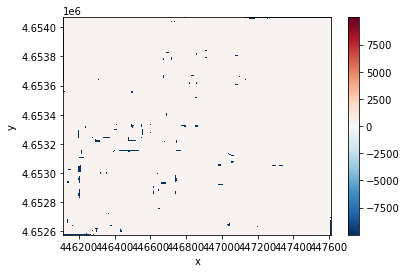

In [24]:
ds1.plot()

(array([  17796.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2220211.]),
 array([-9999.   , -8967.334, -7935.668, -6904.002, -5872.336, -4840.67 ,
        -3809.004, -2777.338, -1745.672,  -714.006,   317.66 ]),
 <BarContainer object of 10 artists>)

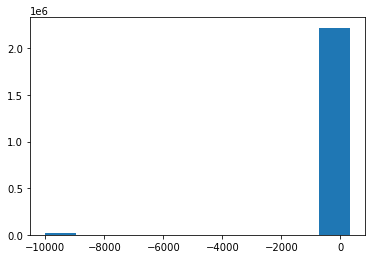

In [26]:
ds1.plot.hist()

In [27]:
!ls

1_view_IA_MN.ipynb	    gistfile1.txt	  iowa_pdal_pipeline.json
2_iowa_model_example.ipynb  ia_northcentral.json  iowa.tif
filename.txt		    iowa.laz


In [28]:
! mv iowa.laz iowa.tif ~/ia

In [29]:
! docker image ls

REPOSITORY                  TAG       IMAGE ID       CREATED         SIZE
p1                          latest    91b82db20366   2 days ago      1.38GB
ltools                      latest    ac7bd8f9115f   4 days ago      544MB
gplus                       latest    2670c0f3e4d2   4 days ago      454MB
dumb                        latest    74aacb086710   5 days ago      397MB
ubuntu                      latest    3f4714ee068a   10 days ago     77.8MB
httpd                       2.4       c30a46771695   12 days ago     144MB
ubuntu                      21.04     7cc39f89fa58   2 months ago    80MB
connormanning/entwine       latest    0ad5f7215868   19 months ago   1.8GB
jonazpiazu/potree           latest    1f781e5e9d5c   2 years ago     665MB
ubuntu                      17.10     e211a66937c6   3 years ago     100MB
connormanning/http-server   latest    10888664627c   3 years ago     72.7MB


In [35]:
# convert with conner manning

! docker run -it -v /home/ec2-user/ia:/entwine connormanning/entwine build -i /entwine/iowa.laz -o /entwine/IOWA

1/1: /entwine/iowa.laz
Dimensions: [
        X:int32, Y:int32, Z:int32, Intensity:uint16, ReturnNumber:uint8,
        NumberOfReturns:uint8, ScanDirectionFlag:uint8, EdgeOfFlightLine:uint8,
        Classification:uint8, ScanAngleRank:float32, UserData:uint8,
        PointSourceId:uint16, GpsTime:float64, Red:uint16, Green:uint16, Blue:uint16
]
Points: 1,399,943
Bounds: [(446112, 4652575, 269), (447611, 4654068, 318)]
Scale: 0.01
SRS: EPSG:26915

Adding 0 - /entwine/iowa.laz
Joining
	Done 0
Saving
Wrote 1,399,943 points.


In [34]:
! pdal info /home/ec2-user/ia/iowa.laz

{
  "file_size": 7005851,
  "filename": "/home/ec2-user/ia/iowa.laz",
  "now": "2022-05-02T19:54:32+0000",
  "pdal_version": "2.4.0 (git-version: 997a1c)",
  "reader": "readers.las",
  "stats":
  {
    "bbox":
    {
      "EPSG:4326":
      {
        "bbox":
        {
          "maxx": -93.63281591,
          "maxy": 42.03690722,
          "maxz": 317.66,
          "minx": -93.65104831,
          "miny": 42.02336364,
          "minz": 269.66
        },
        "boundary": { "type": "Polygon", "coordinates": [ [ [ -93.65091097807796, 42.023363644850917, 269.66 ], [ -93.651048311348703, 42.036806125650209, 269.66 ], [ -93.632949422299845, 42.036907224588347, 317.66 ], [ -93.632815912574117, 42.023464716601524, 317.66 ], [ -93.65091097807796, 42.023363644850917, 269.66 ] ] ] }
      },
      "native":
      {
        "bbox":
        {
          "maxx": 447610.55,
          "maxy": 4654067.77,
          "maxz": 317.66,
          "minx": 446112.39,
          "miny": 4652575.19,
          "m

In [36]:
! ls ~/ia/IOWA

ept-build.json	ept-data  ept-hierarchy  ept.json  ept-sources


In [39]:
# use connor manning http server on port 80

! docker run -it -v ~/ia:/var/www -p 8080:8080 connormanning/http-server

Starting up http-server, serving /var/www
Available on:
  http://127.0.0.1:8080
  http://172.17.0.2:8080
Hit CTRL-C to stop the server
[Mon May 02 2022 23:19:40 GMT+0000 (Coordinated Universal Time)] "GET /ept.json" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0"
[Mon May 02 2022 23:19:40 GMT+0000 (Coordinated Universal Time)] "GET /ept.json" Error (404): "Not found"
[Mon May 02 2022 23:19:56 GMT+0000 (Coordinated Universal Time)] "GET /IOWA/ept.json" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0"
[Mon May 02 2022 23:19:56 GMT+0000 (Coordinated Universal Time)] "GET /IOWA/ept-hierarchy/0-0-0-0.json" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0"
[Mon May 02 2022 23:19:56 GMT+0000 (Coordinated Universal Time)] "GET /IOWA/ept-data/0-0-0-0.laz" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0"
[Mon May 02 2022 23:19:58 GMT+0000 (Coordinated Universal Time)] "

[vizit](https://potree.entwine.io/data/custom.html?r=http://10.12.71.190/IOWA/ept.json)

- https://potree.entwine.io/data/custom.html?r=http://localhost/IOWA/ept.json

In [40]:
! wget https://potree.entwine.io/data/custom.html

--2022-05-02 23:35:30--  https://potree.entwine.io/data/custom.html
Resolving potree.entwine.io (potree.entwine.io)... 99.84.66.109, 99.84.66.33, 99.84.66.78, ...
Connecting to potree.entwine.io (potree.entwine.io)|99.84.66.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2420 (2.4K) [text/html]
Saving to: ‘custom.html’

100%[======================================>] 2,420       --.-K/s   in 0s      

2022-05-02 23:35:30 (225 MB/s) - ‘custom.html’ saved [2420/2420]



In [41]:
!cat custom.html

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="utf-8">
	<meta name="description" content="">
	<meta name="author" content="">
	<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no">
	<title>Potree Viewer</title>

	<link rel="stylesheet" type="text/css" href="../build/potree/potree.css">
	<link rel="stylesheet" type="text/css" href="../libs/jquery-ui/jquery-ui.min.css">
	<link rel="stylesheet" type="text/css" href="../libs/perfect-scrollbar/css/perfect-scrollbar.css">
	<link rel="stylesheet" type="text/css" href="../libs/openlayers3/ol.css">
	<link rel="stylesheet" type="text/css" href="../libs/spectrum/spectrum.css">
	<link rel="stylesheet" type="text/css" href="../libs/jstree/themes/mixed/style.css">
    <link rel="stylesheet" href="../css/entwine.css" type="text/css">
</head>
<body>
	<script src="../libs/jquery/jquery-3.1.1.min.js"></script>
	<script src="../libs/spectrum/spectrum.js"></script>
	<script src="../libs/perfect-scrollbar/js/perf

In [42]:
! wget  https://potree.entwine.io/js/script.js

--2022-05-03 00:03:35--  https://potree.entwine.io/js/script.js
Resolving potree.entwine.io (potree.entwine.io)... 99.84.66.109, 99.84.66.74, 99.84.66.78, ...
Connecting to potree.entwine.io (potree.entwine.io)|99.84.66.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15530 (15K) [application/javascript]
Saving to: ‘script.js’

100%[======================================>] 15,530      --.-K/s   in 0s      

2022-05-03 00:03:36 (315 MB/s) - ‘script.js’ saved [15530/15530]



In [43]:
!cat script.js

var maybeParse = function(key, val) {
    if (['r', 'resource', 'location'].includes(key)) {
        if (val[0] == '[') return JSON.parse(val);
        if (val[0] != '"') return val;
    }
    return JSON.parse(val);
};

var queryParam = function(name) {
    name = name.replace(/[\[\]]/g, '\\$&');
    var regex = new RegExp('[?&]' + name + '(=([^&#]*)|&|#|$)');
    var results = regex.exec(window.location.href);
    if (!results) return null;
    if (!results[2]) return true;

    return maybeParse(name, decodeURIComponent(results[2].replace(/\+/g, ' ')));
}

var Vec = (x, y, z) => {
    if (Array.isArray(x)) return new THREE.Vector3(x[0], x[1], x[2]);
    else return new THREE.Vector3(x, y, z);
};

var addAnnotation = (v) => {
    viewer.scene.addAnnotation(Vec(v.pos), {
        title: v.name,
        cameraPosition: Vec(v.cpos),
        cameraTarget: Vec(v.ctgt),
        actions: v.actions
    });
};

var mobileRegex =
    /Android|webOS|iPhone|iPad|iPod|BlackBerry|IEMobile|Opera Min